<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Changed by Nov05 on 2019-05-31
# /DS-Unit-1-Sprint-1-Dealing-With-Data

In [1]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import re
import calendar
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
# check pandas version
pd.__version__

'0.23.4'

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
name_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names'

In [22]:
# inspect the data file, comma separated
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1
34,60,1,1
34,61,10,1
34,67,7,1
34,60,0,1
35,64,13,1
35,63,0,1
36,60,1,1
36,69,0,1
37,60,0,1
37,63,0,1
37,58,0,1
37,59,6,1
37,60,15,1
37,63,0,1
38,69,21,2
38,59,2,1
38,60,0,1
38,60,0,1
38,62,3,1
38,64,1,1
38,66,0,1
38,66,11,1
38,60,1,1
38,67,5,1
39,66,0,2
39,63,0,1
39,67,0,1
39,58,0,1
39,59,2,1
39,63,4,1
40,58,2,1
40,58,0,1
40,65,0,1
41,60,23,2
41,64,0,2
41,67,0,2
41,58,0,1
41,59,8,1
41,59,0,1
41,64,0,1
41,69,8,1
41,65,0,1
41,65,0,1
42,69,1,2
42,59,0,2
42,58,0,1
42,60,1,1
42,59,2,1
42,61,4,1
42,62,20,1
42,65,0,1
42,63,1,1
43,58,52,2
43,59,2,2
43,64,0,2
43,64,0,2
43,63,14,1
43,64,2,1
43,64,3,1
43,60,0,1
43,63,2,1
43,65,0,1
43,66,4,1
44,64,6,2
44,58,9,2
44,63,19,2
44,61,0,1
44,63,1,1
44,61,0,1
44,67,16,1
45,65,6,2
45,66,0,2
45,67,1,2
45,60,0,1
45,67,0,1
45,59,14,1
45,64,0,1
45,68,0,1
45,67,1,1
46,58,2,2
46,69,3,2
46,62,5,2
46,65,20,2
46,62,0,1
46,58,3,1
46,63,0,1
47,63,23,2
47,62,0,2
47,6

In [12]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [13]:
# load data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

--2019-05-31 15:32:29--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data’

haberman.data       100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-05-31 15:32:29 (325 MB/s) - ‘haberman.data’ saved [3103/3103]



In [0]:
# !unzip <filename>.zip

In [0]:
my_data = pd.read_csv('haberman.data', header=None)

In [25]:
my_data.shape # shape should be (306, 4)

(306, 4)

In [26]:
my_data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [27]:
# check data types
my_data.dtypes

0    int64
1    int64
2    int64
3    int64
dtype: object

In [28]:
# check NAs
my_data.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

**Dataset Attribute Information:**  
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

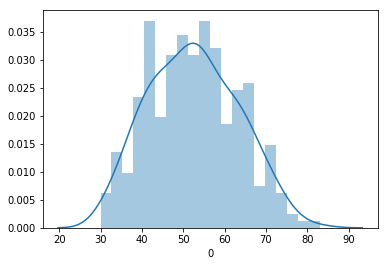

In [40]:
# distribution of Age of patient at time of operation (numerical)
sns.distplot(my_data[0], bins=20);

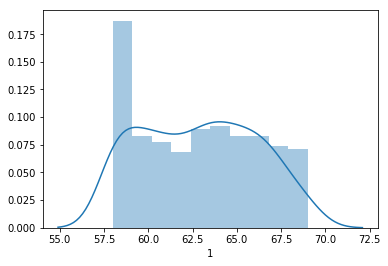

In [38]:
# distribution of Patient's year of operation (year - 1900, numerical)
sns.distplot(my_data[1], bins=10);

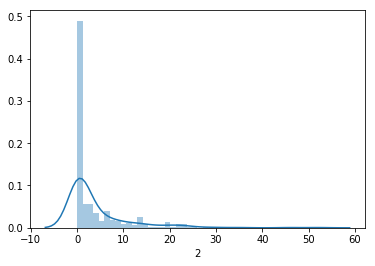

In [42]:
# distribution of Number of positive axillary nodes detected (numerical)
sns.distplot(my_data[2]);

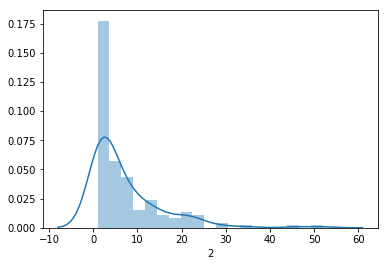

In [45]:
# distribution of Number of positive axillary nodes detected (numerical)
# remove 0s (exluding people whose positive axillary nodes not detected)
sns.distplot(my_data[my_data[2] != 0][2]);

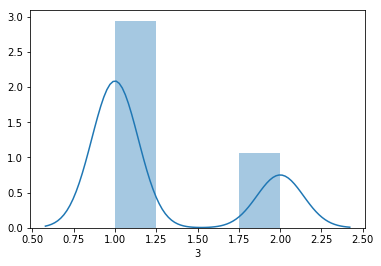

In [47]:
# distribute of Survival status (class attribute) 
#   1 = the patient survived 5 years or longer 
#   2 = the patient died within 5 years
sns.distplot(my_data[3]);

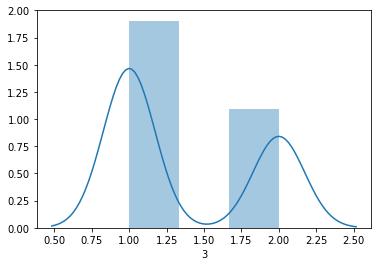

In [48]:
# distribute of Survival status (class attribute) 
#   1 = the patient survived 5 years or longer 
#   2 = the patient died within 5 years
# remove 0s (exluding people whose positive axillary nodes not detected). 
# still there are more people who survived 5 years or longer than dies within 5 years
sns.distplot(my_data[my_data[2] != 0][3]);

In [55]:
# rename columns to have better readability
# 'Nodes detected' = Number of positive axillary nodes detected
my_data.columns = ['Age of patient', 'Year of operation', 'Nodes detected', 'Survive status']
my_data.head()

,Age of patient,Year of operation,Nodes detected,Survive status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


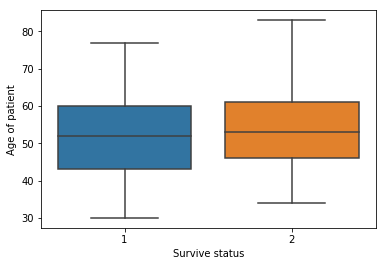

In [62]:
# distribute of Survival status (class attribute) 
#   1 = the patient survived 5 years or longer 
#   2 = the patient died within 5 years
sns.boxplot(x='Survive status', y='Age of patient', data=my_data);

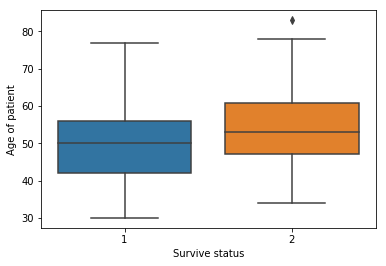

In [61]:
# distribute of Survival status (class attribute) 
#   1 = the patient survived 5 years or longer 
#   2 = the patient died within 5 years
# remove 0s (exluding people whose positive axillary nodes not detected). 
# still there are more people who survived 5 years or longer than dies within 5 years
sns.boxplot(x='Survive status', y='Age of patient', data=my_data[my_data['Nodes detected'] != 0]);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

- **"Nodes deteced" seems to have a negative relationship with survival, the more deteced the less year to survive.**
- **"Age of patient" seems to have a positive relationship with survival (after age 40), the older the more years to survive.**
- **"Age of patient" seems to have a negative relationship with "Nodes detected" (after age 40), the younger the more positive axillary nodes detected.**

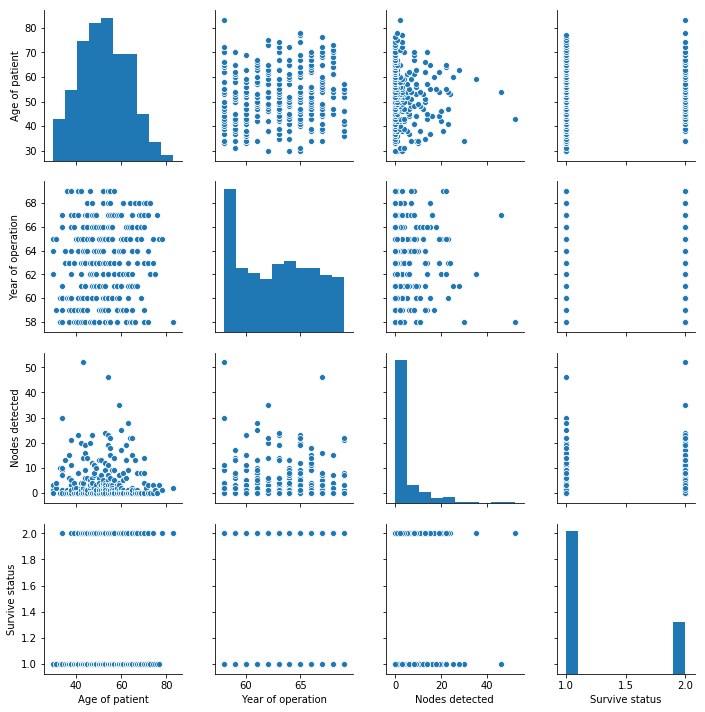

In [64]:
# first take a look at pairs of all features
# It seems age and nodes detected are correlated, "operation year and age" are not.
# Also it seems more operations were carried on the patience with less nodes deteced.
sns.pairplot(my_data);

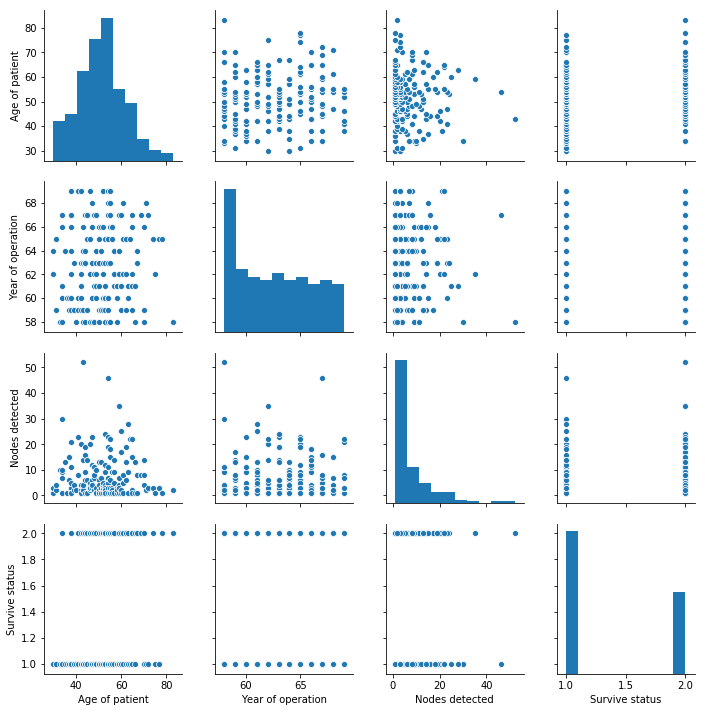

In [57]:
# pairs of all features - remove patients whose nodes were not detected
sns.pairplot(my_data[my_data['Nodes detected'] != 0]);

In [0]:
age_bins, age_intervals = pd.cut(my_data['Age of patient'], bins=5, precision=0, retbins=True)

In [69]:
ct1 = pd.crosstab(my_data['Survive status'], age_bins, normalize='columns')
ct1                                   

Age of patient,"(30.0, 41.0]","(41.0, 51.0]","(51.0, 62.0]","(62.0, 72.0]","(72.0, 83.0]"
Survive status,,,,,
1,0.906977,0.686869,0.71875,0.728814,0.666667
2,0.093023,0.313131,0.28125,0.271186,0.333333


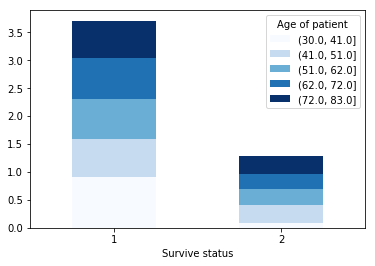

In [82]:
# it seems age doesn't correlate with survive status much.
ct1.plot(kind='bar', stacked=True, colormap='Blues', rot=0);

In [92]:
ct4 = pd.crosstab(age_bins, my_data['Survive status'], normalize='columns') 
ct4

Survive status,1,2
Age of patient,,
"(30.0, 41.0]",0.173333,0.049383
"(41.0, 51.0]",0.302222,0.382716
"(51.0, 62.0]",0.306667,0.333333
"(62.0, 72.0]",0.191111,0.197531
"(72.0, 83.0]",0.026667,0.037037


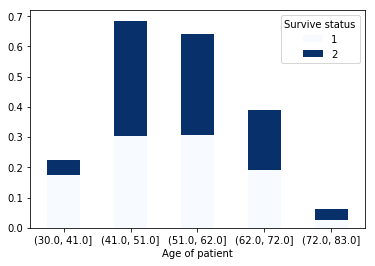

In [93]:
# it seems before age 40, age correlates with survival negatively, the older the harder to survive,
# after age 40, age correlates with survive status slightly positively, the older the longer year to survive
ct4.plot(kind='bar', stacked=True, colormap='Blues', rot=0);

In [0]:
nodes_bins, nodes_intervals = pd.cut(my_data['Nodes detected'], bins=10, precision=0, retbins=True)

In [86]:
ct2 = pd.crosstab(my_data['Survive status'], nodes_bins, normalize='columns')
ct2

Nodes detected,"(-0.1, 5.0]","(5.0, 10.0]","(10.0, 16.0]","(16.0, 21.0]","(21.0, 26.0]","(26.0, 31.0]","(31.0, 36.0]","(42.0, 47.0]","(47.0, 52.0]"
Survive status,,,,,,,,,
1,0.805085,0.6,0.388889,0.5,0.333333,1.0,0.0,1.0,0.0
2,0.194915,0.4,0.611111,0.5,0.666667,0.0,1.0,0.0,1.0


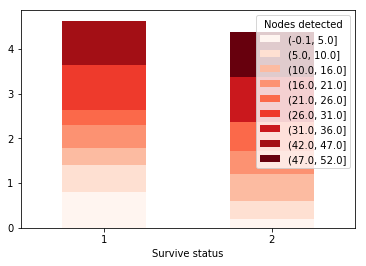

In [88]:
# Can't tell the correlation from this plot
ct2.plot(kind='bar', stacked=True, colormap='Reds', rot=0);

In [90]:
ct3 = pd.crosstab(nodes_bins, my_data['Survive status'], normalize='columns')
ct3

Survive status,1,2
Nodes detected,,
"(-0.1, 5.0]",0.844444,0.567901
"(5.0, 10.0]",0.080000,0.148148
"(10.0, 16.0]",0.031111,0.135802
"(16.0, 21.0]",0.017778,0.049383
"(21.0, 26.0]",0.013333,0.074074
"(26.0, 31.0]",0.008889,0.000000
"(31.0, 36.0]",0.000000,0.012346
"(42.0, 47.0]",0.004444,0.000000
"(47.0, 52.0]",0.000000,0.012346


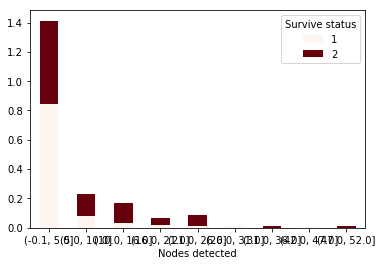

In [91]:
# it seems nodes deteced does correlate with survive status somehow.
ct3.plot(kind='bar', stacked=True, colormap='Reds', rot=0);

In [94]:
ct5 = pd.crosstab(age_bins, nodes_bins, normalize='columns')
ct5

Nodes detected,"(-0.1, 5.0]","(5.0, 10.0]","(10.0, 16.0]","(16.0, 21.0]","(21.0, 26.0]","(26.0, 31.0]","(31.0, 36.0]","(42.0, 47.0]","(47.0, 52.0]"
Age of patient,,,,,,,,,
"(30.0, 41.0]",0.139831,0.166667,0.166667,0.000,0.111111,0.5,0.0,0.0,0.0
"(41.0, 51.0]",0.313559,0.366667,0.388889,0.500,0.222222,0.0,0.0,0.0,1.0
"(51.0, 62.0]",0.313559,0.300000,0.222222,0.375,0.444444,0.0,1.0,1.0,0.0
"(62.0, 72.0]",0.194915,0.166667,0.222222,0.125,0.222222,0.5,0.0,0.0,0.0
"(72.0, 83.0]",0.038136,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0


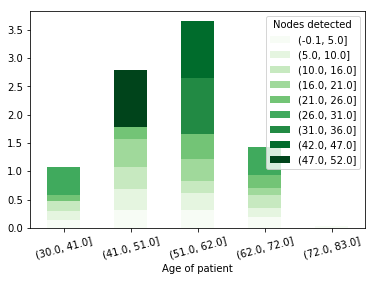

In [99]:
# it seems nodes deteced does correlate with survive status somehow.
ct5.plot(kind='bar', stacked=True, colormap='Greens', rot=15);

In [96]:
ct6 = pd.crosstab(nodes_bins, age_bins, normalize='columns')
ct6

Age of patient,"(30.0, 41.0]","(41.0, 51.0]","(51.0, 62.0]","(62.0, 72.0]","(72.0, 83.0]"
Nodes detected,,,,,
"(-0.1, 5.0]",0.767442,0.747475,0.770833,0.779661,1.0
"(5.0, 10.0]",0.116279,0.111111,0.093750,0.084746,0.0
"(10.0, 16.0]",0.069767,0.070707,0.041667,0.067797,0.0
"(16.0, 21.0]",0.000000,0.040404,0.031250,0.016949,0.0
"(21.0, 26.0]",0.023256,0.020202,0.041667,0.033898,0.0
"(26.0, 31.0]",0.023256,0.000000,0.000000,0.016949,0.0
"(31.0, 36.0]",0.000000,0.000000,0.010417,0.000000,0.0
"(42.0, 47.0]",0.000000,0.000000,0.010417,0.000000,0.0
"(47.0, 52.0]",0.000000,0.010101,0.000000,0.000000,0.0


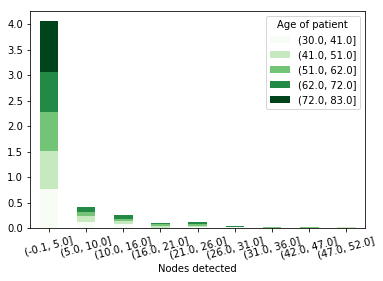

In [109]:
# can't tell much from this plot
ct6.plot(kind='bar', stacked=True, colormap='Greens', rot=15);

In [110]:
# 3D cross table
ct7 = pd.crosstab(my_data['Survive status'], [age_bins, nodes_bins], normalize='columns')
ct7

Age of patient (30.0, 41.0]                                        \
Nodes detected  (-0.1, 5.0] (5.0, 10.0] (10.0, 16.0] (21.0, 26.0]   
Survive status                                                      
1                  0.939394         0.8          1.0          0.0   
2                  0.060606         0.2          0.0          1.0   

Age of patient              (41.0, 51.0]                           \
Nodes detected (26.0, 31.0]  (-0.1, 5.0] (5.0, 10.0] (10.0, 16.0]   
Survive status                                                      
1                       1.0      0.77027    0.545455     0.428571   
2                       0.0      0.22973    0.454545     0.571429   

Age of patient                                        (51.0, 62.0]  \
Nodes detected (16.0, 21.0] (21.0, 26.0] (47.0, 52.0]  (-0.1, 5.0]   
Survive status                                                       
1                       0.5          0.0          0.0     0.797297   
2                       0.5          1.0          1.0     0.202703   

Age of patient                                                     \
Nodes detected (5.0, 10.0] (10.0, 16.0] (16.0, 21.0] (21.0, 26.0]   
Survive status                                                      
1                 0.555556          0.0     0.666667          0.5   
2                 0.444444          1.0     0.333333          0.5   

Age of patient                           (62.0, 72.0]              \
Nodes detected (31.0, 36.0] (42.0, 47.0]  (-0.1, 5.0] (5.0, 10.0]   
Survive status                                                      
1                       0.0          1.0     0.804348         0.6   
2                       1.0          0.0     0.195652         0.4   

Age of patient                                                      \
Nodes detected (10.0, 16.0] (16.0, 21.0] (21.0, 26.0] (26.0, 31.0]   
Survive status                                                       
1                      0.25          0.0          0.5          1.0   
2                      0.75          1.0          0.5          0.0   

Age of patient (72.0, 83.0]  
Nodes detected  (-0.1, 5.0]  
Survive status               
1                  0.666667  
2                  0.333333

In [111]:
ct7.shape

(2, 25)

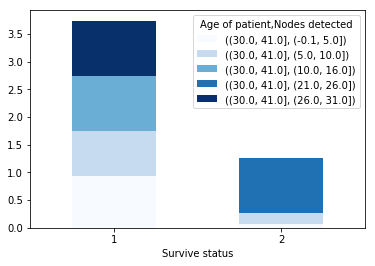

In [125]:
ct8 = ct7.iloc[:, 0:5]
ct8.plot(kind='bar', stacked=True, colormap='Blues', rot=0);

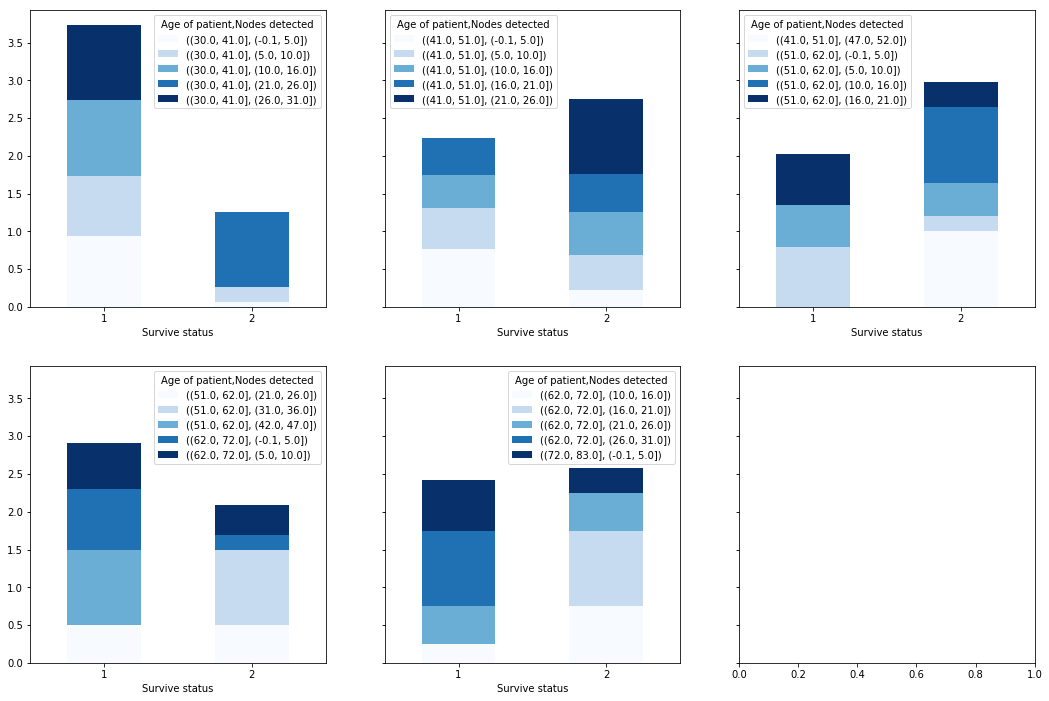

In [129]:
fig, axes = plt.subplots(nrows=2, ncols=3, 
                         sharey=True, figsize=(18, 12))
for row in range(2):
  for col in range(3):
    if (row != 1 or col != 2):
      idx = row * 3 + col
      ct = ct7.iloc[:, idx*5:(idx+1)*5]
      ct.plot(ax=axes[row, col], kind='bar', stacked=True, colormap='Blues', rot=0);

In [130]:
# 3D cross table
ct9 = pd.crosstab(my_data['Survive status'], [nodes_bins, age_bins], normalize='columns')
ct9

Nodes detected  (-0.1, 5.0]                                         \
Age of patient (30.0, 41.0] (41.0, 51.0] (51.0, 62.0] (62.0, 72.0]   
Survive status                                                       
1                  0.939394      0.77027     0.797297     0.804348   
2                  0.060606      0.22973     0.202703     0.195652   

Nodes detected               (5.0, 10.0]                            \
Age of patient (72.0, 83.0] (30.0, 41.0] (41.0, 51.0] (51.0, 62.0]   
Survive status                                                       
1                  0.666667          0.8     0.545455     0.555556   
2                  0.333333          0.2     0.454545     0.444444   

Nodes detected              (10.0, 16.0]                            \
Age of patient (62.0, 72.0] (30.0, 41.0] (41.0, 51.0] (51.0, 62.0]   
Survive status                                                       
1                       0.6          1.0     0.428571          0.0   
2                       0.4          0.0     0.571429          1.0   

Nodes detected              (16.0, 21.0]                            \
Age of patient (62.0, 72.0] (41.0, 51.0] (51.0, 62.0] (62.0, 72.0]   
Survive status                                                       
1                      0.25          0.5     0.666667          0.0   
2                      0.75          0.5     0.333333          1.0   

Nodes detected (21.0, 26.0]                                         \
Age of patient (30.0, 41.0] (41.0, 51.0] (51.0, 62.0] (62.0, 72.0]   
Survive status                                                       
1                       0.0          0.0          0.5          0.5   
2                       1.0          1.0          0.5          0.5   

Nodes detected (26.0, 31.0]              (31.0, 36.0] (42.0, 47.0]  \
Age of patient (30.0, 41.0] (62.0, 72.0] (51.0, 62.0] (51.0, 62.0]   
Survive status                                                       
1                       1.0          1.0          0.0          1.0   
2                       0.0          0.0          1.0          0.0   

Nodes detected (47.0, 52.0]  
Age of patient (41.0, 51.0]  
Survive status               
1                       0.0  
2                       1.0

In [131]:
ct9.shape

(2, 25)

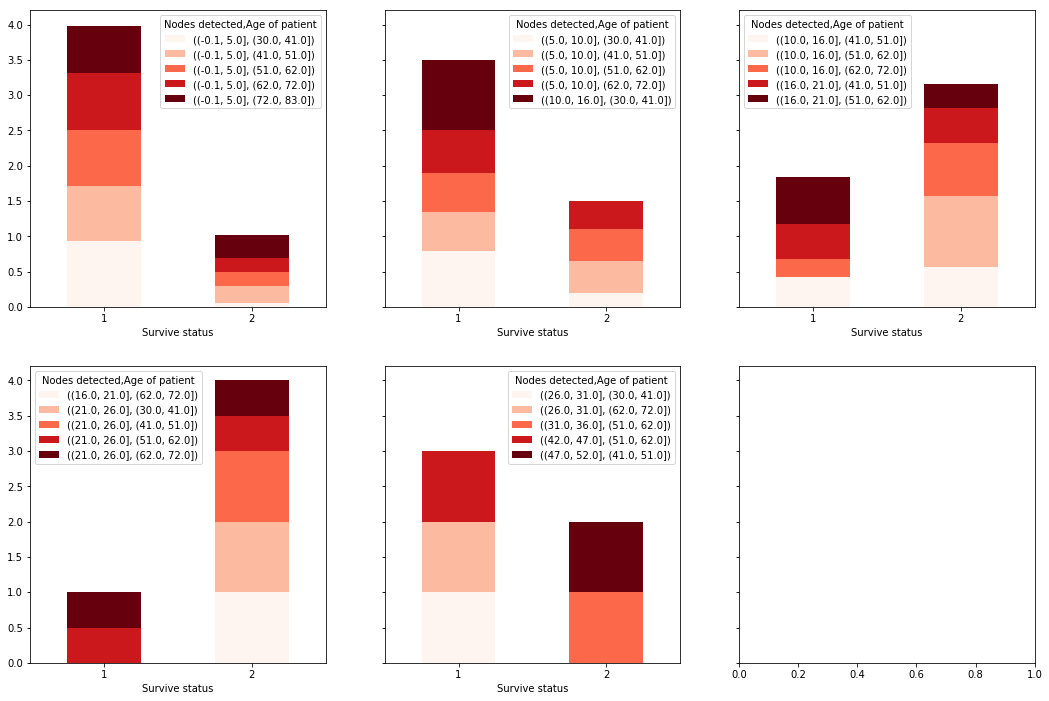

In [132]:
fig, axes = plt.subplots(nrows=2, ncols=3, 
                         sharey=True, figsize=(18, 12))
for row in range(2):
  for col in range(3):
    if (row != 1 or col != 2):
      idx = row * 3 + col
      ct = ct9.iloc[:, idx*5:(idx+1)*5]
      ct.plot(ax=axes[row, col], kind='bar', stacked=True, colormap='Reds', rot=0);